# Pandas Basics

todo! TOC

# Part I
## Data Import

In [57]:
%pip install pandas matplotlib

     |████████████████████████████████| 7.3 MB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 965 kB 15.9 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 26.8 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 21.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/daniel_david_kovacs/.pyenv/versions/3.11.0a6/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import re
from typing import List

def source_path(file_pattern: str) -> List[str]:
    dir = os.path.join(
        # os.path.dirname(__file__),
        os.path.pardir,
        'datasets',
        'imdb_full'
    )
    source_files = [
        os.path.abspath(os.path.join(dir, f)) 
        for f 
        in os.listdir(dir) 
        if re.match(file_pattern, f)]
    return source_files

In [2]:
import pandas as pd

with open(source_path(r"movies_.*\.csv")[0]) as movies:
    movies_df = pd.read_csv(movies)

movies_df

,movieid,title,year
0,1672052,'Breaker' Morant (1980),1980
1,1672111,'Crocodile' Dundee II (1988),1988
2,1672580,'Til There Was You (1997),1997
3,1672716,"'night, Mother (1986)",1986
4,1672946,...And Justice for All (2014),2014
...,...,...,...
3827,2591814,eXistenZ (1999),1999
3828,2592334,¡Three Amigos! (1986),1986
3829,2592963,À nous la liberté (1931),1931
3830,2593112,Á köldum klaka (1995),1995


In [92]:
with open(source_path(r"actors_.*\.csv")[0]) as actors:
    actors_df = pd.read_csv(actors)

actors_df

,actorid,name,sex
0,4,"$hort, Too",M
1,16,"'Bear'Boyd, Steven",M
2,28,"'Dead End' Kids, The",M
3,566,"Aaby, Kristian",M
4,580,Aadil,M
...,...,...,...
98685,2749162,"Ôshima, Akiyo",F
98686,2749168,"Ôshima, Yukari",F
98687,2749204,"Ôtani, Ikue",F
98688,2749377,"Örnólfsdóttir, Álfrún",F


In [105]:
with open(source_path(r"movies2actors_.*\.csv")[0]) as movies_actors:
    movies_actors_df = pd.read_csv(movies_actors)

movies_actors_df

,movieid,actorid,as_character,leading
0,1672052,88796,[Court reporter] <20>,20
1,1672052,88848,[Col. Ian 'Johnny' Hamilton] <7>,7
2,1672052,121878,[Lt. Reed] <21>,21
3,1672052,134348,[Large Boer] <41>,41
4,1672052,198682,[Lt. Peter Handcock] <4>,4
...,...,...,...,...
138344,2593313,2439175,[Camello en Vespa] <6>,6
138345,2593313,2486754,[Farmacéutica] <12>,12
138346,2593313,2521993,[Periodista] <9>,9
138347,2593313,2568546,[Alma] <4>,4


In [69]:
with open(source_path(r"ratings_.*\.csv")[0]) as ratings:
    ratings_df = pd.read_csv(ratings)

ratings_df

,movieid,rank,votes,distribution
0,1672052,7.8,8111.0,0000001222
1,1672111,5.3,32183.0,0001221000
2,1672580,4.4,1894.0,0011110000
3,1672716,7.0,1255.0,0000001212
4,1673647,6.5,128.0,0000111211
...,...,...,...,...
3768,2591814,6.8,56563.0,0000012210
3769,2592334,6.2,36951.0,0000122100
3770,2592963,7.6,2294.0,0000002311
3771,2593112,6.9,1231.0,0000012211


## DataFrames

![frame](https://i.gifer.com/6hxX.gif)

like tables, has two dimensions: columns - with names, and rows.

In [46]:
print("--- DataFrame ---")
df = pd.DataFrame({"column A": [1, 2, 3], "column B": ['a', 'b', 'c']})
print("NB! Leave df-s as last statement in notebook cell, gets pretty printed."
      "Python print(...) is less pretty. Observe:\n")
print(df)
print("\n--- vs. ---\n")
df

--- DataFrame ---
NB! Leave df-s as last statement in notebook cell, gets pretty printed.Python print(...) is less pretty. Observe:

   column A column B
0         1        a
1         2        b
2         3        c

--- vs. ---



,column A,column B
0,1,a
1,2,b
2,3,c


In [17]:
print("type of DataFrame object: ", type(df))

type of DataFrame object:  <class 'pandas.core.frame.DataFrame'>


### Index
DataFrames can have indices. Single, or multi level.

Default index (above) is a 0-based range, with no name. Index can be
- renamed
- set to a different column
- opt to keep or discard existing index, when setting a new one.

Index can also be converted into regular columns.

In [12]:
# rename index
df.index.rename("my_index", inplace=True)
df

,column A,column B
my_index,,
0,1,a
1,2,b
2,3,c


In [13]:
# add another column:
df["blip"] = ["blup", "blup", "blargh"]
df

,column A,column B,blip
my_index,,,
0,1,a,blup
1,2,b,blup
2,3,c,blargh


In [15]:
df.set_index("blip", append=True, inplace=True)
df

,,column A,column B
my_index,blip,,
0,blup,1,a
1,blup,2,b
2,blargh,3,c


In [16]:
# turn index into column
df.reset_index(level=0, inplace=True)
df

,my_index,column A,column B
blip,,,
blup,0,1,a
blup,1,2,b
blargh,2,3,c


### set - reset index
- SET turns column into index
- RESET turns index into column

## Series
Series is like a single column of a DataFrame, a sequence.

NB! Sequence can also be indexed.

In [21]:
print(' --- Series --- ')
s = df['column B']  # select column of a dataframe
s

 --- Series --- 


blip
blup      a
blup      b
blargh    c
Name: column B, dtype: object

NB! Series don't pretty print, like DataFrames :(

In [35]:
print("Type of series object: ", type(s))

Type of series object:  <class 'pandas.core.series.Series'>


In [36]:
print("Index of a series: ")
s.index

Index of a series: 


Index(['blup', 'blup', 'blargh'], dtype='object', name='blip')

### Broadcasting
One of the powers of Pandas is that an operation between a series and a scalar is understood as: perform operation elementwise:

In [30]:
print("numeric series to play with: df['column A']")
num_series = df['column A']
num_series


numeric series to play with: df['column A']


blip
blup      1
blup      2
blargh    3
Name: column A, dtype: int64

In [32]:
print("multiply series: num_series * 10")
num_series * 10

multiply series: num_series * 10


blip
blup      10
blup      20
blargh    30
Name: column A, dtype: int64

In [29]:
print("boolean operations: num_series > 2")
num_series > 2

boolean operations:


blip
blup      False
blup      False
blargh     True
Name: column A, dtype: bool

### String Functions
broadcasting string functions are namespaced under `.str`, like:
- upper()
- lower()
- endswith()
- startswith()
- contains()
- ...

In [51]:
str_series = df['column B']
str_series

0    a
1    b
2    c
Name: column B, dtype: object

In [34]:
print('.str namespace functions:')
str_series.str.upper()

.str namespace functions:


blip
blup      A
blup      B
blargh    C
Name: column B, dtype: object

**NB!** similar namespacing exists for date functions: `pandas.Series.dt`

## Filtering DataFrames
square bracket notation fetches a series from a dataframe. Pass a 
- single column name to get a series from one column
- a list of columns to get a new dataframe with only the specified columns
- a list of booleans to filter row-wise
    - True keeps the row
    - False drops the row

### Filtering Columns
Specify multiple column names as a list in dataframe index

In [47]:
df['Column C'] = df['Column C'].str.upper() + "_" + df['column A'].astype(str)
df

,column A,column B,Column C
0,1,a,A_1
1,2,b,B_2
2,3,c,C_3


In [52]:
# only column B and C
df[["column B", "Column C"]]

,column B,Column C
0,a,A_1
1,b,B_2
2,c,C_3


### Filtering Rows
Filter rows with a sequence of bools acting as a mask

In [53]:
# lets keep the first and third row only
df[[True, False, True]]

,column A,column B,Column C
0,1,a,A_1
2,3,c,C_3


It would be of little use, if the bool list had to be created by hand. Remember the broadcasting operations on series, that produce bools?

In [54]:
print("True for odd, False for even numbers: ")
df['column A'] % 2 == 1

True for odd, False for even numbers: 


0     True
1    False
2     True
Name: column A, dtype: bool

And now combining the two:

In [55]:
df[df['column A'] % 2 == 1]

,column A,column B,Column C
0,1,a,A_1
2,3,c,C_3


## Index revisited

Q: What can you do with indeces? 
A: search, target rows. 
Q: How is this different from filtering?
A: Its faster: building a mask: O(n). search in an index: O(log n)
    - sequential search vs
    - binary search

Use `.loc` to address by index value. If Index has more levels, unless explicitly specifying the level, addresses from outermost to innermost index.

In [106]:
star_wars = movies_df[movies_df['title'].str.contains("Star Wars")].head(1)['movieid'].values[0]

In [107]:
%%time
movies_actors_df[movies_actors_df['movieid'] == star_wars]

CPU times: user 1.1 ms, sys: 868 µs, total: 1.97 ms
Wall time: 1.33 ms


,movieid,actorid,as_character,leading
99016,2371726,48805,(voice) (uncredited) [Red Two],0
99017,2371726,65783,[Gold Five] <23>,23
99018,2371726,85263,[R2-D2] <7>,7
99019,2371726,112876,(voice) (uncredited) [Stormtrooper],0
99020,2371726,201345,[Uncle Owen] <11>,11
99021,2371726,222918,[General Willard] <15>,15
99022,2371726,345672,[Grand Moff Tarkin] <4>,4
99023,2371726,356845,[C-3PO] <6>,6
99024,2371726,511760,[Han Solo] <2>,2
99025,2371726,619864,[Ben Obi-Wan Kenobi] <5>,5


### Multiple Levels of Indeces
![index](https://s3.eu-central-1.amazonaws.com/mustang6-static/userupload/1488/ezgif-3-d5cb338f41.gif)

In [109]:
m2a = movies_actors_df.set_index(['movieid', 'actorid'])
m2a

as_character  leading
movieid actorid                                            
1672052 88796               [Court reporter]  <20>       20
        88848    [Col. Ian 'Johnny' Hamilton]  <7>        7
        121878                    [Lt. Reed]  <21>       21
        134348                  [Large Boer]  <41>       41
        198682           [Lt. Peter Handcock]  <4>        4
...                                            ...      ...
2593313 2439175            [Camello en Vespa]  <6>        6
        2486754               [Farmacéutica]  <12>       12
        2521993                  [Periodista]  <9>        9
        2568546                        [Alma]  <4>        4
        2633550                    [Camello]  <24>       24

[138349 rows x 2 columns]

In [111]:
%%time
m2a.loc[star_wars]

CPU times: user 958 µs, sys: 624 µs, total: 1.58 ms
Wall time: 811 µs


,as_character,leading
actorid,,
48805,(voice) (uncredited) [Red Two],0
65783,[Gold Five] <23>,23
85263,[R2-D2] <7>,7
112876,(voice) (uncredited) [Stormtrooper],0
201345,[Uncle Owen] <11>,11
222918,[General Willard] <15>,15
345672,[Grand Moff Tarkin] <4>,4
356845,[C-3PO] <6>,6
511760,[Han Solo] <2>,2


What do you get, when you have only partially addressed the indeces? You get a dataframe. See above!
![look up](https://i.giphy.com/media/cUIX3QHGEyfow1QZgw/giphy.gif)

What do you get, when you have addressed all levels of indeces? You get a series. See below!
![look down](https://i.giphy.com/media/229Ozo6sMl3K69NgwE/giphy.gif)

In [115]:
aunt_beru = m2a.loc[star_wars, 2060656]
print(type(aunt_beru))
aunt_beru

<class 'pandas.core.series.Series'>


as_character    [Aunt Beru]  <12>
leading                        12
Name: (2371726, 2060656), dtype: object

Index can be moved back (promoted? demoted?) to regular column with reset_index. If no more indeces remain, a 0-based range series is going to be the new index:

In [116]:
m2a.reset_index()

,movieid,actorid,as_character,leading
0,1672052,88796,[Court reporter] <20>,20
1,1672052,88848,[Col. Ian 'Johnny' Hamilton] <7>,7
2,1672052,121878,[Lt. Reed] <21>,21
3,1672052,134348,[Large Boer] <41>,41
4,1672052,198682,[Lt. Peter Handcock] <4>,4
...,...,...,...,...
138344,2593313,2439175,[Camello en Vespa] <6>,6
138345,2593313,2486754,[Farmacéutica] <12>,12
138346,2593313,2521993,[Periodista] <9>,9
138347,2593313,2568546,[Alma] <4>,4


So:

`pandas.DataFrame.set_index()` 

![going down](https://media.tenor.com/1DEtZPIsYN8AAAAC/sliding-going-downstair.gif)

moves column **down** 👇 to index

__AND__

`pandas.DataFrame.reset_index()`

![going up](https://forumstatic.oneplusmobile.com/opforum-gl/upload/image/front/thread/20220615/05115/1089200630801104905/1089200630801104905.gif)

moves index **up** 👆 to a column


NB! don't forget to `sort_index()` after `set_index()` - or do... 

## The rest
- head
- tail
- isnull
- notnull
- fillnull
- sort

## Plot
When we have an index and a value, it can be plotted. Let's plot the number of movies released by year.

<Axes: >

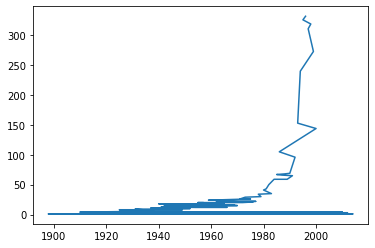

In [58]:
movies_df['year'].value_counts().plot()

What's going on with the plot? It's lopsided... let's inspect the series:

In [59]:
# what's going on with the plot, looks lopsided?
movies_df['year'].value_counts()

1996    332
1995    326
1998    319
1997    311
1999    273
       ... 
1898      1
2014      1
1908      1
2001      1
2013      1
Name: year, Length: 108, dtype: int64

It is sorted by frequency, not by year. NB! year is the index, frequency is the value of the series.

Let's sort by year and then plot:

<Axes: >

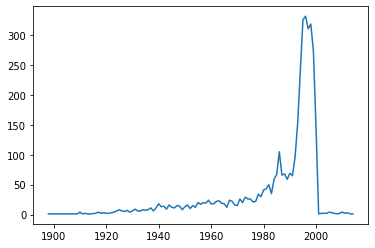

In [60]:
# sorted by frequency
movies_df['year'].value_counts().sort_index().plot()

### Other Plots
In a default plot x comes from index, y comes from a serie's values. Override, by eplicitly specifying x, y in plot arguments.

Plot kind is a str argument, eg: 'scatter'

<Axes: xlabel='rank', ylabel='votes'>

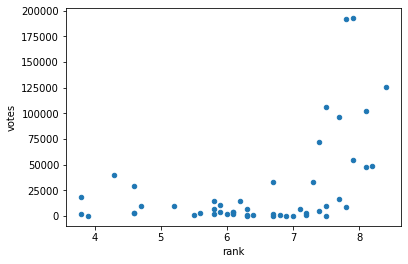

In [82]:
ratings_df.sample(50).plot(x='rank', y='votes', kind='scatter')

<Axes: >

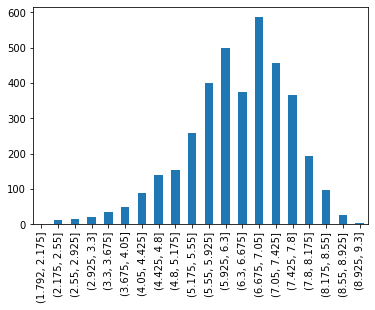

In [78]:
ratings_df['rating_bins'] = pd.cut(ratings_df['rank'], bins=20)
ratings_df['rating_bins'].value_counts().sort_index().plot(kind='bar')

## Exercise I.
### How many movies in dataframe?

In [19]:
print("Total number of movies: ", len(movies_df))

3832


### What are the earliest two films?

In [28]:
movies_df.sort_values('year').head(2)

,title,year
movieid,,
2452309,The Lodger (1898),1898
1677472,"20,000 Leagues Under the Sea (1905)",1905


### How many movies have the title "Hamlet"?

In [30]:
hamlets = movies_df[movies_df['title'].str.contains("Hamlet")]
print("Number of movies with 'Hamlet' in the title: ", len(hamlets))

Number of movies with 'Hamlet' in the title:  5


### When was the first movie titled "Hamlet" made?

In [35]:
hamlets.sort_values('year').head(1)

,title,year
movieid,,
1984751,Hamlet (1907),1907


### Number of movies made in 1981

In [39]:
movies_81 = movies_df[movies_df["year"] == 1981].sort_values('year')
print("Number of movies made in '81: ", len(movies_81))

Number of movies made in '81:  43


### Number of movies made between 1990 and 1995

In [41]:
movies_90_95 = movies_df[(movies_df['year'] >= 1990) & (movies_df['year'] <= 1995)]
print("Number of movies made '90–'95: ", len(movies_90_95))

Number of movies made '90–'95:  949


### How many movie rankings without votes?

In [52]:
ratings_df[ratings_df['votes'].isna()]

,movieid,rank,votes,distribution
22,1682630,8.1,NaN,NaN
2291,2281612,4.4,NaN,NaN


### Display the roles, in leading order, of the 1972 film "Solyaris".

In [68]:
# get movie id
solaris_id = movies_df[movies_df['title'] == "Solyaris (1972)"].index.values[0]
# find all the roles in solaris
# NB! output is a series, not a table
movies_actors_df[movies_actors_df['movieid'] == solaris_id].set_index('leading').sort_index()['as_character']
# todo! merge the two tables

leading
1                                           [Hari]  <1>
2                                    [Kris Kelvin]  <2>
3                                      [Dr. Snaut]  <3>
4                                   [Henri Berton]  <4>
5                                [Kelvin's Father]  <5>
6                                  [Dr. Sartorius]  <6>
7           (as O. Barnet)  [Kris Kelvin's Mother]  <7>
8           (as V. Kerdimun)  [André Berton's son]  <8>
9         (as O. Kizilova)  [Gibarian's she-guest]  <9>
10                          [Kris Kelvin's niece]  <10>
11    (as A. Misharin)  [Shannahan, Berton's expedit...
12          (as B. Oganesyan)  [Professor Trajet]  <12>
13                     [Anna, Kris Kelvin's aunt]  <13>
14    (as S. Sarkisyan)  [Dr. Gibarian, a physiologi...
15    (as Yu. Semyonov)  [Chairman of Investigation ...
16            [Kris Kelvin in his early teen-age]  <16>
17                               (as V. Sumenova)  <17>
18           (as G. Tejkh)  [Professor M

# Part II.

- combining datasets
- grouping rows
- pivots

![two](https://media2.giphy.com/media/AE7Qa6j57XuRzeMkgh/giphy.gif)

## Merge
combines datasets

In [122]:
actors_df

,actorid,name,sex
0,4,"$hort, Too",M
1,16,"'Bear'Boyd, Steven",M
2,28,"'Dead End' Kids, The",M
3,566,"Aaby, Kristian",M
4,580,Aadil,M
...,...,...,...
98685,2749162,"Ôshima, Akiyo",F
98686,2749168,"Ôshima, Yukari",F
98687,2749204,"Ôtani, Ikue",F
98688,2749377,"Örnólfsdóttir, Álfrún",F


In [126]:
movies_denorm = movies_df \
    .merge(movies_actors_df, on='movieid') \
    .merge(actors_df, on='actorid')
movies_denorm

,movieid,title,year,actorid,as_character,leading,name,sex
0,1672052,'Breaker' Morant (1980),1980,88796,[Court reporter] <20>,20,"Ball, Ray (I)",M
1,1672052,'Breaker' Morant (1980),1980,88848,[Col. Ian 'Johnny' Hamilton] <7>,7,"Ball, Vincent (I)",M
2,2190900,Muriel's Wedding (1994),1994,88848,[Priest] <56>,56,"Ball, Vincent (I)",M
3,2247366,Paradise Road (1997),1997,88848,[Mr. Dickson] <27>,27,"Ball, Vincent (I)",M
4,2350992,Sirens (1993),1993,88848,[Bishop of Sydney] <13>,13,"Ball, Vincent (I)",M
...,...,...,...,...,...,...,...,...
138344,2593313,Átame! (1990),1990,2099917,(as Almudena Gracia) [Enfermera] <25>,25,"Gracia, Malena",F
138345,2593313,Átame! (1990),1990,2438134,[Hija de Lola] <20>,20,"Pajuelo, Francisca",F
138346,2593313,Átame! (1990),1990,2486754,[Farmacéutica] <12>,12,"Rabal, Concha",F
138347,2593313,Átame! (1990),1990,2521993,[Periodista] <9>,9,"Romeu, Montse G.",F


## GroupBy

groups by (duh!) values in columns, setting up one, or multiple levels of indeces

In [129]:
movies_denorm.groupby(['name', 'year'])

When we group, the rest of the columns need some kind of aggregation. Eg.:
- size: how many rows got grouped together
- min
- max
- ...
- transform

In [135]:
movies_denorm[movies_denorm['name'].str.contains('Clooney')] \
    .groupby(['name', 'year', 'title'])  \
    .size()

name               year  title                                   
Clooney, George    1996  From Dusk Till Dawn (1996)                  1
                         One Fine Day (1996)                         1
                   1997  Batman & Robin (1997)                       1
                         Full Tilt Boogie (1997)                     1
                         The Peacemaker (1997)                       1
                   1998  Out of Sight (1998)                         1
                         The Thin Red Line (1998)                    1
                   1999  South Park: Bigger Longer & Uncut (1999)    1
                         The Limey (1999)                            1
                         Three Kings (1999)                          1
                   2000  The Perfect Storm (2000)                    1
Clooney, Rosemary  1954  White Christmas (1954)                      1
                   1994  Radioland Murders (1994)                    1
dtype: int6

Note how the indexes are sorted as an outcome of groupby!

or we can plot the number of roles George Clooney had in each year:

<Axes: xlabel='year'>

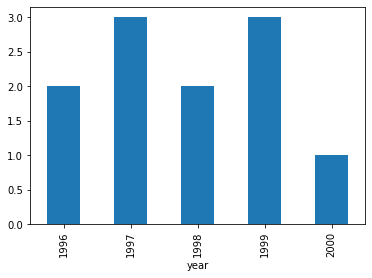

In [137]:
movies_denorm[movies_denorm['name'] == 'Clooney, George']  \
    .groupby('year')  \
    .size()  \
    .plot(kind='bar')


Or we can see what the worst role is by year:

<Axes: xlabel='year'>

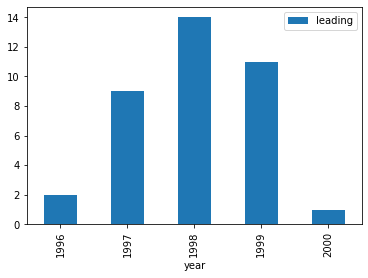

In [143]:
movies_denorm[movies_denorm['name'] == 'Clooney, George']  \
    .groupby('year')  \
    .max('leading')  \
    .drop(columns=['movieid', 'actorid'])  \
    .plot(kind='bar')


or use `.agg()` to pass in multiple aggregation functions:

<Axes: xlabel='year'>

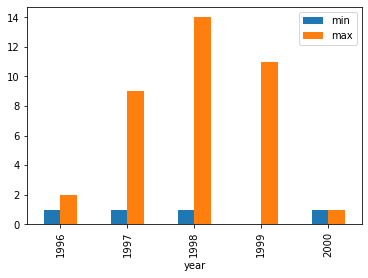

In [154]:
# george clooney's most and least important roles by year
movies_denorm[movies_denorm['name'] == 'Clooney, George']  \
    .groupby('year')  \
    .agg(['min', 'max'])['leading']  \
    .plot(kind='bar')


Groupby does not necessarily need a column name. It can group by any series, even if that is not part of the dataframe. For example, let's group by decade

<Axes: xlabel='year'>

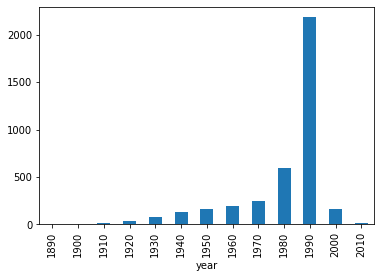

In [150]:
movies_df  \
    .groupby(movies_df['year'] // 10 * 10)  \
    .size()  \
    .plot(kind='bar')

## Pivots
- turning column values into columns
- turning column names into values

Let's compare the number of actors vs actresses by decade:

In [162]:
actors_actressess_by_decade = movies_denorm  \
    .groupby([
        movies_denorm['year'] // 10 * 10, 
        movies_denorm['sex'].map(lambda _: "actor" if _ == "M" else "actress").rename("kind")
    ])  \
    .size()
actors_actressess_by_decade

year  kind   
1900  actor          2
      actress        2
1910  actor         62
      actress       37
1920  actor        210
      actress      111
1930  actor        835
      actress      324
1940  actor       1488
      actress      530
1950  actor       1977
      actress      753
1960  actor       2826
      actress     1132
1970  actor       5924
      actress     2135
1980  actor      16843
      actress     7024
1990  actor      60679
      actress    28654
2000  actor       4380
      actress     2340
2010  actor         53
      actress       28
dtype: int64

For comparison, we want 'kind' to be a column: use `.unstack` to move values __up__ from the index into column names: 

In [163]:
actors_actressess_by_decade.unstack()

kind,actor,actress
year,,
1900,2,2
1910,62,37
1920,210,111
1930,835,324
1940,1488,530
1950,1977,753
1960,2826,1132
1970,5924,2135
1980,16843,7024


NB! kind, before the unstack is an index:

In [187]:
actors_actressess_by_decade.index.names

FrozenList(['year', 'kind'])

<Axes: xlabel='year'>

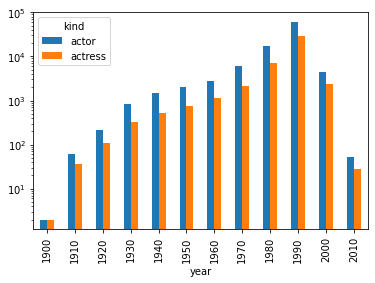

In [167]:
actors_actressess_by_decade.unstack().plot(kind='bar', logy=True)

We can then, for example, compute a column with the difference in the number of male and female roles by decade:

In [171]:
aa = actors_actressess_by_decade.unstack()
aa['diff'] = aa['actor'] - aa['actress']
aa

kind,actor,actress,diff
year,,,
1900,2,2,0
1910,62,37,25
1920,210,111,99
1930,835,324,511
1940,1488,530,958
1950,1977,753,1224
1960,2826,1132,1694
1970,5924,2135,3789
1980,16843,7024,9819


<Axes: xlabel='year'>

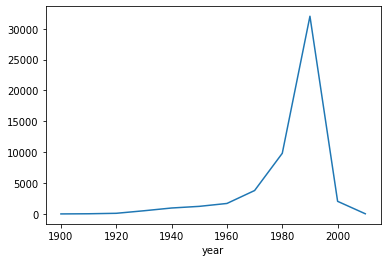

In [172]:
aa['diff'].plot()

What if we wanted it the other way around? Kind in the index, decades in the columns? `unstack()` by default moves up the innermost index, override with param `level` 

In [173]:
year_by_kind = actors_actressess_by_decade.unstack(level=0)
year_by_kind

year,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
kind,,,,,,,,,,,,
actor,2,62,210,835,1488,1977,2826,5924,16843,60679,4380,53
actress,2,37,111,324,530,753,1132,2135,7024,28654,2340,28


Reverse operation of `unstack` is, surprisingly, `stack`:

In [174]:
year_by_kind.stack()

kind     year
actor    1900        2
         1910       62
         1920      210
         1930      835
         1940     1488
         1950     1977
         1960     2826
         1970     5924
         1980    16843
         1990    60679
         2000     4380
         2010       53
actress  1900        2
         1910       37
         1920      111
         1930      324
         1940      530
         1950      753
         1960     1132
         1970     2135
         1980     7024
         1990    28654
         2000     2340
         2010       28
dtype: int64

As is the case with unstack, stack moves the column names into the innermost index. Default argument specifies which level of column name (yup, that's also a kind of index) to move into the index. There is no parameter to specify which level of index it is going to end up in, its always the innermost one. 

But fear not, we can always swap the levels of the indeces with `swaplevel`. 

In [184]:
year_by_kind.stack().swaplevel(0, 1)

year  kind   
1900  actor          2
1910  actor         62
1920  actor        210
1930  actor        835
1940  actor       1488
1950  actor       1977
1960  actor       2826
1970  actor       5924
1980  actor      16843
1990  actor      60679
2000  actor       4380
2010  actor         53
1900  actress        2
1910  actress       37
1920  actress      111
1930  actress      324
1940  actress      530
1950  actress      753
1960  actress     1132
1970  actress     2135
1980  actress     7024
1990  actress    28654
2000  actress     2340
2010  actress       28
dtype: int64

But-but-but... the indeces are now flat, there is no grouping... we need to re-sort:

In [185]:
year_by_kind.stack().swaplevel(0, 1).sort_index()

year  kind   
1900  actor          2
      actress        2
1910  actor         62
      actress       37
1920  actor        210
      actress      111
1930  actor        835
      actress      324
1940  actor       1488
      actress      530
1950  actor       1977
      actress      753
1960  actor       2826
      actress     1132
1970  actor       5924
      actress     2135
1980  actor      16843
      actress     7024
1990  actor      60679
      actress    28654
2000  actor       4380
      actress     2340
2010  actor         53
      actress       28
dtype: int64

...much better now. To recap: 

`stack` moves column name __DOWN__ into the index
![come down](https://media0.giphy.com/media/7OklPi77dA11WwPxnN/giphy.gif)

`unstack` moves index __UP__ into column name
![go up](https://media2.giphy.com/media/kfLIA5rPSEdYrGvWLw/giphy.gif)

If there are no more indeces (or columns) after stacking / unstacking, we get a series. Otherwise a DataFrame

### Pivot vs Stack?
`pivot` = `set_index` + `sort_index` + `unstack`

![pivot](https://i.gifer.com/1XJe.gif)

# Exercice II.
...